# NLP Project-2        
### Name : Shubhankar Thakar, net id: sat170430

## Importing Required Modules

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import pandas as pd
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\shubh\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Importing CSV file 

In [2]:
tweets = pd.read_csv("E://NLP//project2//tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301130888122000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,570300817074462000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [3]:
tweets.shape

(14640, 15)

In [4]:
pd.isnull(tweets).sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Running sentiment analysis using Vader

In [5]:
sentiment = SentimentIntensityAnalyzer()

In [6]:
reviews = pd.DataFrame(tweets['text'])
reviews.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [7]:
reviews['polarity_score'] = reviews['text'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
reviews['neutral'] = reviews['text'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
reviews['negative'] = reviews['text'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
reviews['positive'] = reviews['text'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])

In [8]:
reviews

,text,polarity_score,neutral,negative,positive
0,@VirginAmerica What @dhepburn said.,0.0000,1.000,0.000,0.000
1,@VirginAmerica plus you've added commercials t...,0.0000,1.000,0.000,0.000
2,@VirginAmerica I didn't today... Must mean I n...,0.0000,1.000,0.000,0.000
3,@VirginAmerica it's really aggressive to blast...,-0.5984,0.754,0.246,0.000
4,@VirginAmerica and it's a really big bad thing...,-0.5829,0.679,0.321,0.000
5,@VirginAmerica seriously would pay $30 a fligh...,-0.5945,0.670,0.256,0.074
6,"@VirginAmerica yes, nearly every time I fly VX...",0.6908,0.678,0.000,0.322
7,@VirginAmerica Really missed a prime opportuni...,0.1458,0.643,0.160,0.197
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",-0.3477,0.415,0.367,0.218
9,"@VirginAmerica it was amazing, and arrived an ...",0.7717,0.642,0.000,0.358


## Splitting the tweets into 5 bins

In [9]:
reviews['sentiment']=''

In [69]:
reviews.loc[(reviews['polarity_score'] > 0.6), 'sentiment'] = 'Strongly Positive'
reviews.loc[(reviews['polarity_score'] >= 0.25) & (reviews['polarity_score'] <= 0.6), 'sentiment'] = 'Moderate Positive'
reviews.loc[(reviews['polarity_score'] < 0.25) & (reviews['polarity_score'] > -0.25), 'sentiment'] = 'Neutral'
reviews.loc[(reviews['polarity_score'] <= -0.25) & (reviews['polarity_score'] >= -0.6), 'sentiment'] = 'Moderate negative'
reviews.loc[(reviews['polarity_score'] < -0.6), 'sentiment'] = 'Strongly Negative'


reviews

,text,polarity_score,neutral,negative,positive,sentiment,negativereason
0,@VirginAmerica What @dhepburn said.,0.0000,1.000,0.000,0.000,Neutral,NaN
1,@VirginAmerica plus you've added commercials t...,0.0000,1.000,0.000,0.000,Neutral,NaN
2,@VirginAmerica I didn't today... Must mean I n...,0.0000,1.000,0.000,0.000,Neutral,NaN
3,@VirginAmerica it's really aggressive to blast...,-0.5984,0.754,0.246,0.000,Moderate negative,Bad Flight
4,@VirginAmerica and it's a really big bad thing...,-0.5829,0.679,0.321,0.000,Moderate negative,Can't Tell
5,@VirginAmerica seriously would pay $30 a fligh...,-0.5945,0.670,0.256,0.074,Moderate negative,Can't Tell
6,"@VirginAmerica yes, nearly every time I fly VX...",0.6908,0.678,0.000,0.322,Strongly Positive,NaN
7,@VirginAmerica Really missed a prime opportuni...,0.1458,0.643,0.160,0.197,Neutral,NaN
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",-0.3477,0.415,0.367,0.218,Moderate negative,NaN
9,"@VirginAmerica it was amazing, and arrived an ...",0.7717,0.642,0.000,0.358,Strongly Positive,NaN


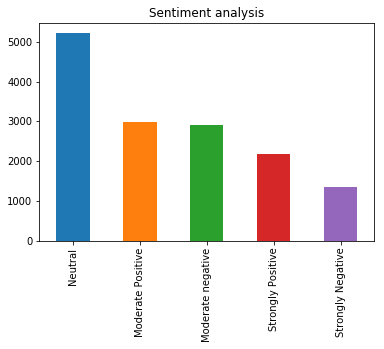

In [11]:
%matplotlib inline
reviews.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis")

## What topics do customers tend to discuss when tweets are negative (Using given Column)

In [12]:
reviews['negativereason'] = tweets['negativereason']

In [13]:
reviews[(reviews['sentiment'] == 'Moderate negative') | (reviews['sentiment'] == 'Strongly Negative') ]['negativereason'].value_counts()

Customer Service Issue         1146
Late Flight                     730
Cancelled Flight                516
Can't Tell                      451
Lost Luggage                    289
Bad Flight                      249
Flight Attendant Complaints     234
Flight Booking Problems         168
longlines                        71
Damaged Luggage                  40
Name: negativereason, dtype: int64

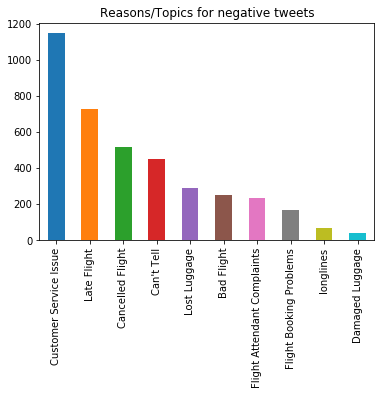

In [14]:
reviews[(reviews['sentiment'] == 'Moderate negative') | (reviews['sentiment'] == 'Strongly Negative') ]['negativereason'].value_counts().plot(kind='bar', title="Reasons/Topics for negative tweets")

## Using my scores

In [15]:
bigtext = ''
for review in reviews[(reviews['sentiment'] == 'Moderate negative') | (reviews['sentiment'] == 'Strongly Negative') ]['text']:
    bigtext = bigtext + '. ' + review

In [16]:
big_tokens = nltk.word_tokenize(bigtext)
big_tokens = [w for w in big_tokens if w.lower() not in string.punctuation]

In [47]:
trigrams = ngrams(big_tokens, 3)

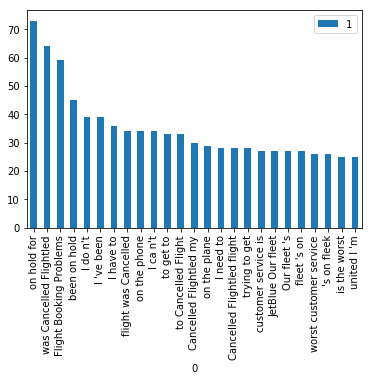

In [48]:
list_trigrams = [' '.join(grams) for grams in trigrams]
newlist = Counter(list_trigrams)
newlist.most_common(40)
newlist = list(newlist.most_common(40))
df = pd.DataFrame(newlist)
df = df.set_index(0)
df.head(25).plot(kind = 'bar')

### By simply looking at the frequent triagrams following are the topics discussed in negative tweets:

### Cancelled flights, Flight Booking Problems, Bad Customer Service, Late Flight, Been on hold

## When tweets are positive, what are travellers happy with..

In [53]:
bigtext1 = ''
for review in reviews[(reviews['sentiment'] == 'Moderate Positive') | (reviews['sentiment'] == 'Strongly Positive') ]['text']:
    bigtext1 = bigtext1 + '. ' + review

In [54]:
big_tokens1 = nltk.word_tokenize(bigtext1)
big_tokens1 = [w for w in big_tokens1 if w.lower() not in string.punctuation]

In [62]:
trigrams1 = ngrams(big_tokens1, 3)

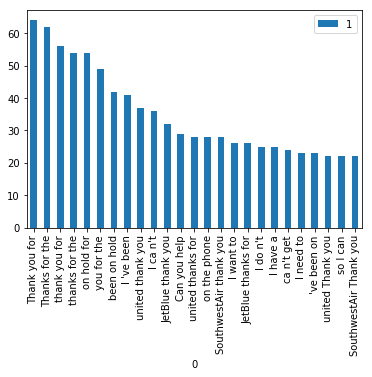

In [63]:
list_trigrams1 = [' '.join(grams) for grams in trigrams1]
newlist1 = Counter(list_trigrams1)
newlist1.most_common(40)
newlist1 = list(newlist1.most_common(40))
df1 = pd.DataFrame(newlist1)
df1 = df1.set_index(0)
df1.head(25).plot(kind = 'bar')

In [189]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("flight")
stopwords.add("united")
stopwords.add("plane")
stopwords.add("now")
stopwords.add("SouthwestAir")
stopwords.add("AmericanAir")
stopwords.add("USAirways")
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(bigtext1)

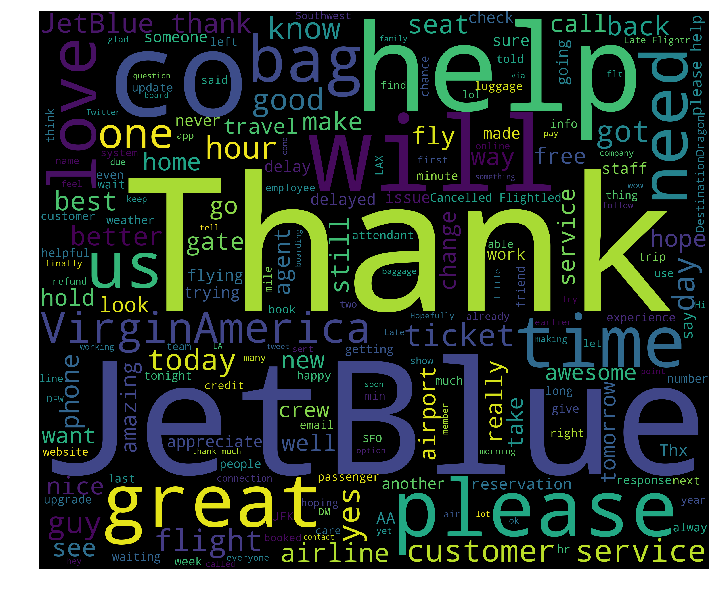

In [190]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### It seems that in positive tweets, travellers are happy with overall service they have received. So trigrams are mostly about thanking the airlines. On the contrary, Negative tweets are issue specific

## What other systematic variations exist among tweets

In [130]:
tweets.describe(include = ['O'])

,airline_sentiment,negativereason,airline,airline_sentiment_gold,name,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,6804,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",2/22/2015 17:15,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,11,157,3744


### Tweets are coming from differnt states in USA with differnt frquencies

In [131]:
tweets['tweet_location'].value_counts().sort_values(ascending = False)

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
Chicago                           104
Los Angeles, CA                    96
New York City                      96
NYC                                95
San Francisco, CA                  91
San Francisco                      86
Chicago, IL                        81
Brooklyn, NY                       66
Austin, TX                         64
Los Angeles                        64
Washington, D.C.                   63
Boston                             62
Dallas, TX                         54
Washington DC                      53
Nashville, TN                      45
NY                                 42
Texas                              42
Philadelphia, PA                   38
San Diego                          38
Denver, CO                         37
Houston, TX                        35
Global      

### Most number of of tweets are tweeted between 9 to 10 am followed by 11 am to 12 pm. following is the distribution of tweets according to time of tweet

In [181]:
lst = []
for i in range(0, len(tweets)):
    lst.append(int(float(tweets['tweet_created'][i].split()[1].replace(':', '.'))))
dictionary = {}

for ele in lst:
    if ele in dictionary.keys():
        dictionary[ele] += 1
    else:
        dictionary[ele] = 0
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1],reverse = True)
print(sorted_by_value)

[(9, 1012), (11, 985), (10, 961), (14, 926), (8, 925), (13, 899), (12, 823), (15, 787), (7, 775), (17, 753), (18, 750), (16, 733), (19, 674), (6, 620), (20, 601), (5, 476), (21, 429), (4, 367), (22, 291), (3, 224), (23, 192), (2, 173), (0, 130), (1, 110)]


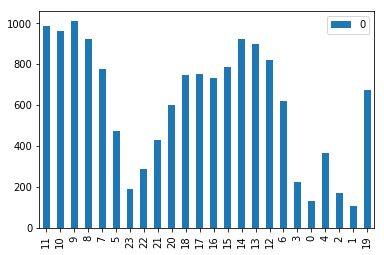

In [182]:
pd.DataFrame.from_dict(dictionary, orient = 'index').plot(kind = 'bar')

# What type of tweets on airlines tend to be retweeted

In [70]:
reviews['retweet_count'] = tweets['retweet_count']

In [76]:
retweets = reviews.sort_values(by = ['retweet_count'], ascending = False)[['sentiment','retweet_count']]

In [81]:
retweets[retweets['retweet_count'] > 0]

,sentiment,retweet_count
11596,Moderate negative,44
11582,Moderate Positive,32
7132,Moderate negative,31
9999,Neutral,28
5607,Strongly Positive,22
7115,Neutral,22
7027,Strongly Negative,18
7111,Neutral,15
7453,Strongly Positive,11
9453,Strongly Positive,9


In [87]:
retweets[retweets['retweet_count'] > 0].groupby('sentiment').mean().sort_values(by = ['retweet_count'], ascending = False)

,retweet_count
sentiment,
Moderate Positive,1.745455
Strongly Positive,1.720000
Moderate negative,1.684783
Neutral,1.510204
Strongly Negative,1.296875


### So tweets with moderate positive sentiments have most retweets on an average followed by strongly positive and moderate negative

# Top 20 customers who are most negative

In [62]:
reviews['name'] = tweets['name']

### in order to figure out top 20 negative custmers, I have taken the mean ploarity scores of all the customers and arranged them in ascending order and then captured first 20 of them

In [67]:
reviews.groupby('name').mean().sort_values(by=['polarity_score'])['polarity_score'][:20]


name
jacob_bach        -0.96680
DominikDesbois    -0.94400
MR_G_LISTER       -0.94000
teitelbaum_jami   -0.93040
tinsleyjim        -0.93020
genna_campos      -0.92870
EdPlotts          -0.92010
AJDelgado13       -0.91910
ParttyM           -0.91540
RameyZafar        -0.91000
theKDaubert       -0.90625
portal_narlish    -0.90620
Asigottech        -0.90560
LeperconRusty     -0.90400
coromex97         -0.89600
hmansfield        -0.89570
tjchesters        -0.88930
chipchilders      -0.88850
ambersings        -0.88700
thewayoftheid     -0.88290
Name: polarity_score, dtype: float64

# Top 20 customers who are most positive

In [74]:
reviews.groupby('name').mean().sort_values(by=['polarity_score'], ascending = False)['polarity_score'][:20]


name
X713              0.9682
ItsLaLoca         0.9541
mardigraschic     0.9499
brookem           0.9484
joesanchezr       0.9467
dHowITzr          0.9467
roxydigital       0.9443
unverkate         0.9431
SunRighteous      0.9427
dom_inic15        0.9423
jbrauninger500    0.9413
Cindy318          0.9410
rsbluhm           0.9401
CEUGRATN          0.9391
Travelzoo         0.9382
GrahamHaigh       0.9381
MaybeTonight      0.9371
emikomusic        0.9364
Bridget__Walsh    0.9363
bobdarealtor      0.9341
Name: polarity_score, dtype: float64

# Bonus

## On an average, how many airlines a customer tends to retweet about

In [115]:
tweets.groupby('name')['airline'].nunique().sort_values(ascending = False)

name
DontenPhoto        5
idk_but_youtube    5
danteusa1          4
betorides          4
AlMehairiAUH       4
woawABQ            4
DavidAlfieWard     4
HanlonBrothers     4
kzone7             4
fromtheleftseat    4
MyCustoAdvocate    4
sundialtours       4
WhatSarahSayzz     3
The_Playmaker20    3
eatgregeat         3
peterfransson      3
wclsc59            3
JEOKOO1            3
HybridMovementC    3
GreenkidspenWRA    3
georgetietjen      3
matthewhirsch      3
WorstThingsBot     3
theycallme_HH      3
jasemccarty        3
bradleycfox        3
JasmineDT          3
alexster4324       3
jamescalderwood    3
DeputyBrans        3
                  ..
icehousepenguin    1
icarolinaperin     1
ibrowning85        1
ibeejd             1
iBHoody            1
iBrianWeaver       1
iGarryC            1
iGoAtNecks         1
iLoveMakados       1
iSmellNothing      1
iWorldSolutions    1
iZoom23            1
iamDavidAustin     1
iamWalkerR         1
iamawarplane       1
iambmac            1
iamchris

In [116]:
tweets.groupby('name')['airline'].nunique().sort_values(ascending = False).value_counts()

1    7527
2     144
3      18
4      10
5       2
Name: airline, dtype: int64

In [117]:
tweets.groupby('name')['airline'].nunique().mean()

1.0283080119465005

### Only 2 customers have tweeted about 5 airlines, 10 customers have tweeted about 4 airlines. 7527 customers have tweeted about 1 airline only. On an average a customer tweets about 1.028 i.e. 1 airline

# Are there customers who are tweeting and retweeting more frequently?

In [126]:
tweets.groupby('name')['tweet_id'].nunique().sort_values(ascending = False)[:5]

name
JetBlueNews    63
kbosspotter    32
_mhertz        29
otisday        28
throthra       27
Name: tweet_id, dtype: int64

### These are top 5 customers tweeting more frequently than others

# Thank You!!